In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

# read data
# show data details

In [2]:
data = pd.read_csv("D:\\most_wonted\\ai_projects\\classification\\data_set\\data1.txt", names=['Exam 1', 'Exam 2', 'Admitted'])
print('data : \n' , data.head(10))
print('data.description : \n' , data.describe())


data : 
       Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
data.description : 
            Exam 1      Exam 2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


# adding a new column called ones before the data

In [3]:
data.insert(0,'ones', 1)
print('new data: \n', data.head(10))

new data: 
    ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1
5     1  45.083277  56.316372         0
6     1  61.106665  96.511426         1
7     1  75.024746  46.554014         1
8     1  76.098787  87.420570         1
9     1  84.432820  43.533393         1


# Separateing positive class examples from negative class

In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
print('Positive Examples : \n', positive.head(10))
print('Negative Examples : \n', negative.head(10))

Positive Examples : 
     ones     Exam 1     Exam 2  Admitted
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
6      1  61.106665  96.511426         1
7      1  75.024746  46.554014         1
8      1  76.098787  87.420570         1
9      1  84.432820  43.533393         1
12     1  82.307053  76.481963         1
13     1  69.364589  97.718692         1
15     1  53.971052  89.207350         1
16     1  69.070144  52.740470         1
Negative Examples : 
     ones     Exam 1     Exam 2  Admitted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
5      1  45.083277  56.316372         0
10     1  95.861555  38.225278         0
11     1  75.013658  30.603263         0
14     1  39.538339  76.036811         0
17     1  67.946855  46.678574         0
20     1  67.372028  42.838438         0
22     1  50.534788  48.855812         0


# draw data

Text(0, 0.5, 'Exam2Score')

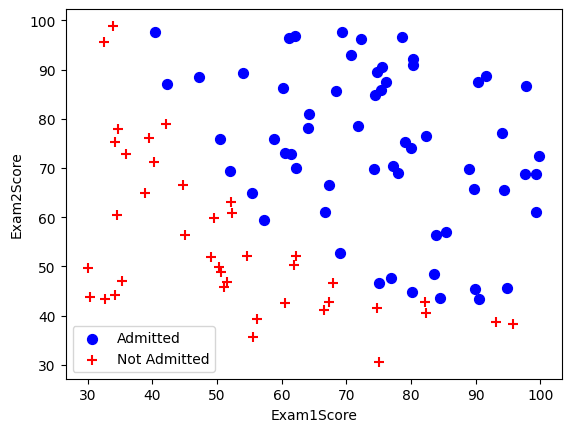

In [5]:
fig, ax = plt.subplots()
ax.scatter(positive['Exam 1'], positive['Exam 2'], c='b',marker='o', s=50, label = 'Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], c='r',marker='+', s=50, label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam1Score')
ax.set_ylabel('Exam2Score')

# separate X (inputs data) from Y (target variable)

In [6]:
cols = data.shape[1]
X = data.iloc[:, : cols-1]
Y = data.iloc[:, cols-1 : cols]
print('X = \n',X.head(10))
print('Y = \n',Y.head(10))

X = 
    ones     Exam 1     Exam 2
0     1  34.623660  78.024693
1     1  30.286711  43.894998
2     1  35.847409  72.902198
3     1  60.182599  86.308552
4     1  79.032736  75.344376
5     1  45.083277  56.316372
6     1  61.106665  96.511426
7     1  75.024746  46.554014
8     1  76.098787  87.420570
9     1  84.432820  43.533393
Y = 
    Admitted
0         0
1         0
2         0
3         1
4         1
5         0
6         1
7         1
8         1
9         1


# convert from data frame to matrix

In [7]:
X = np.matrix(X)
Y = np.matrix(Y)
theata = np.matrix(np.zeros(X.shape[1], dtype = int))


# Sigmoid Function

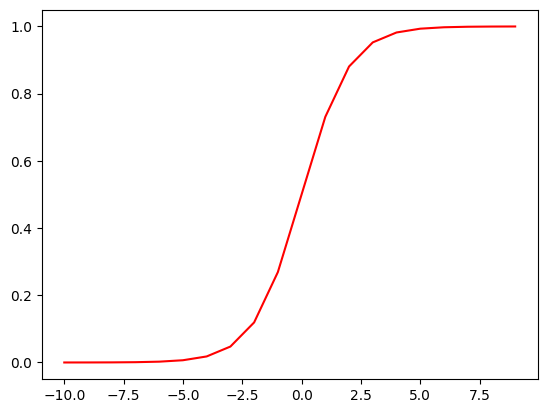

In [8]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

x = np.arange(-10, 10, step=1)
plt.plot(x, sigmoid(x), 'r')

# Cost function

In [9]:
def computeCost(theata, X, Y):
    # we will reconvert theata to matrix on every recall because [[sp.optimize.fmin_tnc]] sends it as an array not matrix
    theata = np.matrix(theata)
    hx = sigmoid(X * theata.T)
    firstTerm = np.multiply(Y, np.log(hx))
    secondTerm = np.multiply((1-Y), np.log((1-hx)))
    return (-1 / len(X)) * np.sum(firstTerm + secondTerm) 
print(computeCost(theata, X,Y))


0.6931471805599453


# GDfunction

In [10]:
def gradientDescent(theata, X, Y):
    # we will reconvert theata to matrix on every recall because [[sp.optimize.fmin_tnc]] sends it as an array not matrix
    theata = np.matrix(theata)

    addedValueToTheata = np.matrix(np.zeros(theata.shape))
    parametersCount = int(theata.shape[1])

    hx = sigmoid(X * theata.T)
    error = hx - Y
    for i in range(parametersCount):
        term = np.multiply(error, X[:, i])
        # we will not subtract from old theata because [[sp.optimize.fmin_tnc]] will do it
        # just compute the new value to be added
        addedValueToTheata[0,i] = (np.sum(term) / len(X))
        
    return addedValueToTheata


In [11]:
result = sp.optimize.fmin_tnc(func= computeCost, x0 = theata, fprime = gradientDescent, args=(X,Y))
print(result)
costafteroptimize = computeCost(result[0], X, Y)
print(costafteroptimize)


(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)
0.20349770158947458


# predict with new theatas

In [12]:
def predict(theata, X):
 predictedY = sigmoid(X * theata.T)
 return [1 if y >= 0.5 else 0 for y in predictedY]

theata_min = np.matrix(result[0])
predictions = predict(theata_min, X)

correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


# Another way to use Gradiant Descent

In [13]:
# def gradientDescent(theata, X, Y,iters, alpha):
#     theata = np.matrix(theata)

#     temp = np.matrix(np.zeros(theata.shape))
#     parametersCount = int(theata.shape[1])

#     for j in range(iters):
#         hx = sigmoid(X * theata.T)
#         error = hx - Y
#         for i in range(parametersCount):
#             term = np.multiply(error, X[:, i])
#             temp[0,i] = theata[0,i] - np.sum(term)* (alpha/ len(X))
#         theata = temp
#     return theata

# iters = 1000000
# alpha = 0.001

# newTheata = gradientDescent(theata, X, Y, iters, alpha)
# cost = computeCost(newTheata,X, Y)

# print(newTheata)
# print(cost)
